# *Gender Bias in Virtual Assistants Project*

### Identificando Preconceitos de Gênero em Assistentes Virtuais

![From Google](https://media-assets-01.thedrum.com/cache/images/thedrum-prod/s3-news-tmp-145694-untitled_design_70--default--1280.png)

### Equipe formada por
- Bárbara Stéphanie Neves Oliveira, 507526
- Lucas Benjamim Cunha Bandeira, 507533
- Samir Braga Chaves, 513788
- Vinicius Bernardo Gabriel, 475210

# LSTM *Classifier for LIGHT Dataset*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Packages

In [2]:
!pip install scikit-multilearn
!pip install tensorflow-addons
!pip install transformers
!pip install keras-tqdm

# Imports

In [3]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
import tensorflow as tf
from tensorflow.keras.metrics import AUC
from tensorflow_addons.metrics import F1Score

from sklearn.metrics import classification_report

BASE_PATH = '/content/drive/MyDrive/Ciência de Dados/Projeto Final'
DATASETS_PATH = BASE_PATH + "/Resources/Datasets"

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.6.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [4]:
# Adicionando módulos customizados ao path
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append(BASE_PATH + '/Modules')

import utils, text, model
from importlib import reload

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.113.132.34:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.113.132.34:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# Leitura dos Dados

In [5]:
df = pd.read_csv(DATASETS_PATH + '/MDGender/md_gender_bias/light_inferred/new_data.csv')
df = df.sample(n=50000, random_state=42)
df.head()

,text,binary_label,binary_score,ternary_label,ternary_score,text_tokens,clean_text,text_tokens_count,clean_text_words2ignore,labels_enc,label_pos_0,label_pos_1,label_pos_2
41210,"head towards the center of the field, there's ...",1,0.7817,neutral,0.6021,"['head', 'center', 'field', 'theres', 'large',...",head towards the center of the field theres a ...,35,head center field theres large scarecrow hes b...,2,0.0,0.0,1.0
51483,"ah, but it has such a magnificent view, don't ...",1,0.6960,neutral,0.6968,"['ah', 'magnificent', 'view', 'dont', 'think']",ah but it has such a magnificent view dont you...,11,ah magnificent view dont think,2,0.0,0.0,1.0
31685,"oh my lord, just you.... i hoped you had some ...",1,0.6653,neutral,0.3772,"['oh', 'lord', 'hoped', 'fine', 'stories', 'te...",oh my lord just you i hoped you had some fine ...,23,oh lord hoped fine stories tell town folk talk...,2,0.0,0.0,1.0
71783,i wonder where the other stable hands have gon...,1,0.7151,neutral,0.8316,"['wonder', 'stable', 'hands', 'gone', 'makeshi...",i wonder where the other stable hands have gon...,33,wonder stable hands gone makeshift beds sacks ...,2,0.0,0.0,1.0
74876,okay this is a bit complicated so be ready to ...,1,0.6280,female,0.4044,"['okay', 'bit', 'complicated', 'ready', 'liste...",okay this is a bit complicated so be ready to ...,12,okay bit complicated ready listen closely,0,1.0,0.0,0.0


In [6]:
labels = ['female', 'male', 'neutral']

# Leitura das *Word Embeddings* Pré-Treinadas

In [7]:
FASTTEXT = {}
f = open(BASE_PATH + '/Resources/FastText Word Embeddings/wiki-news-300d-1M.vec', encoding='utf8')
index = 1

for line in f:
  values = line.split()
  word = values[0]
  FASTTEXT[word] = (index, np.asarray(values[1:], dtype='float32'))
  index += 1
f.close()

print('Quantidade de word embeddings = {}'.format(len(FASTTEXT.keys())))

Quantidade de word embeddings = 999995


# Treinamento do LSTM *Classifier*

## Representação Textual

In [8]:
df['text_tokens'] = df['text_tokens'].apply(lambda x: list(ast.literal_eval(x)))

padded_tokens = text.padding_sequences_ftext(df['text_tokens'].to_numpy(), FASTTEXT, text.MAX_LENGTH)


Text to sequences for LSTM Classifier with FastText embeddings:   0%|          | 0/50000 [00:00<?, ?it/s]

Padding the sequences...


## Divisão Estratificada

In [9]:
y = df[['label_pos_0', 'label_pos_1', 'label_pos_2']].to_numpy()

X_train, y_train, X_test, y_test, X_dev, y_dev = text.data_split(padded_tokens, y, test_size=0.2, dev_size=0.1, random_seed=42)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape), (X_dev.shape, y_dev.shape), y.shape

(((36000, 60), (36000, 3)),
 ((10000, 60), (10000, 3)),
 ((4000, 60), (4000, 3)),
 (50000, 3))

In [10]:
from collections import Counter
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix

result_comb_matrix = pd.DataFrame({
    'data':  Counter(str(combination) for row in get_combination_wise_output_matrix(y, order=1) for combination in row),
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train, order=1) for combination in row),
    'test':  Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=1) for combination in row),
    'dev':   Counter(str(combination) for row in get_combination_wise_output_matrix(y_dev, order=1) for combination in row)
}).T.fillna(0.0)

result_comb_matrix.style.background_gradient(cmap=plt.get_cmap('Pastel2'))

,"(2,)","(0,)","(1,)"
data,31680,10612,7708
train,22810,7641,5549
test,6336,2122,1542
dev,2534,849,617


In [11]:
test_data = pd.DataFrame(columns=['tokens_ids', 'y'])

for ids, y in zip(X_test, y_test):
  test_data = test_data.append({
      'tokens_ids': ids,
      'y': y
  }, ignore_index=True)

test_data.to_json(DATASETS_PATH + '/MDGender/md_gender_bias/light_inferred/lstm_padded_test_data.json', orient='records')

## Treino do Modelo

In [12]:
embedding_dim = 300
embedding_matrix = np.random.random((len(FASTTEXT.keys()) + 1, embedding_dim))

with tqdm_notebook(total=len(FASTTEXT.items())) as pbar:
  for word in FASTTEXT.keys():
      embedding_tuple = FASTTEXT.get(word)
      if embedding_tuple is not None:
          embedding_matrix[embedding_tuple[0]] = embedding_tuple[1]
      pbar.update(1)
  pbar.close()

  0%|          | 0/999995 [00:00<?, ?it/s]

In [13]:
np.random.seed(42)
tf.random.set_seed(42)

auc_score = AUC(multi_label=True)
# f1_score = F1Score(num_classes=y.shape[1], threshold=0.5, average='weighted')

model_path = BASE_PATH + '/Resources/Models/best_lstm_classifier_light.h5'

model_meta = model.run_text_classifier(model.lstm_classifier,
                                       X_train, y_train,
                                       X_dev, y_dev,
                                       batch_size=32,
                                       max_epochs=100,
                                       patience=10,
                                       eval_metric=auc_score,
                                       monitor='val_auc',
                                       source_length=text.MAX_LENGTH,
                                       hidden_units=128,
                                       labels_size=len(labels), 
                                       model_path=model_path,
                                       vocab_size=len(FASTTEXT.keys()) + 1,
                                       embedding_dim=embedding_dim,
                                       embedding_matrix=embedding_matrix)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 60, 300)           299998800 
_________________________________________________________________
lstm (LSTM)                  (None, 60, 128)           219648    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0     

1125/1125 [==============================] - 57s 49ms/step - loss: 0.5407 - auc: 0.5203 - val_loss: 0.5311 - val_auc: 0.6275

Epoch 00001: val_auc improved from -inf to 0.62750, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_lstm_classifier_light.h5
Epoch 2/100
1125/1125 [==============================] - 57s 51ms/step - loss: 0.5226 - auc: 0.6256 - val_loss: 0.4974 - val_auc: 0.7265

Epoch 00002: val_auc improved from 0.62750 to 0.72645, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_lstm_classifier_light.h5
Epoch 3/100
1125/1125 [==============================] - 57s 50ms/step - loss: 0.4761 - auc: 0.7239 - val_loss: 0.4546 - val_auc: 0.7618

Epoch 00003: val_auc improved from 0.72645 to 0.76179, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_lstm_classifier_light.h5
Epoch 4/100
1125/1125 [==============================] - 57s 51ms/step - loss: 0.4

In [14]:
model_meta['run_time'], model_meta['start'], model_meta['final']

('00:45:03', '18/08/2021 09:35', '18/08/2021 10:25')

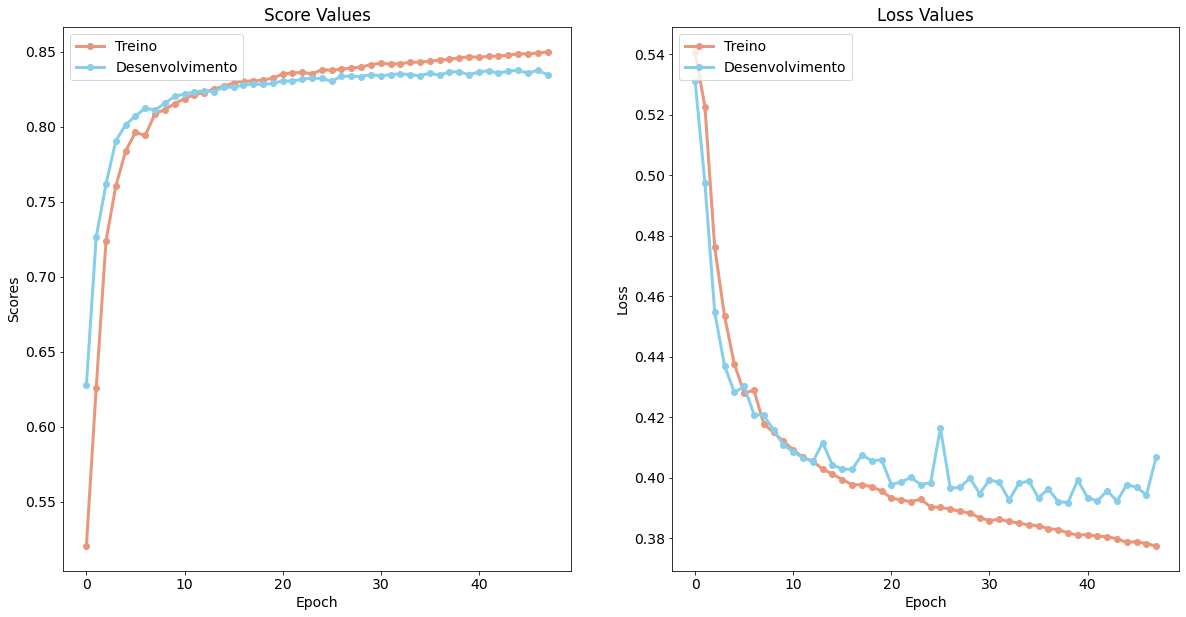

In [15]:
model.plot_model_loss_score(model_meta['history'], score_name='auc')

In [16]:
model_meta['model'].load_weights(model_path)
y_pred = np.rint(model_meta['model'].predict(X_test))

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

      female       0.63      0.40      0.49      2122
        male       0.82      0.31      0.45      1542
     neutral       0.77      0.90      0.83      6336

   micro avg       0.75      0.70      0.73     10000
   macro avg       0.74      0.54      0.59     10000
weighted avg       0.75      0.70      0.70     10000
 samples avg       0.70      0.70      0.70     10000

